 Tasks
1. Data Exploration and Preprocessing
Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
Execute necessary data preprocessing steps including data normalization, managing missing values.
2. Model Implementation
Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
Divide the dataset into training and test sets.
Train your model on the training set and then use it to make predictions on the test set.
3. Hyperparameter Tuning
Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.
4. Evaluation
Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [1]:
import pandas as pd 
import numpy as np 

In [2]:
Data=pd.read_csv("Alphabets_data.csv")

# Display basic information about the dataset
print(Data.info())
print(Data.describe())
print(Data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None
               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.00000

# Data Preprocessing 

In [3]:
# Verifying the missing values 
Data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [4]:
# Verifying the duplicates 
Data.duplicated().sum()

1332

In [5]:
# Removing the duplicates 
Data.drop_duplicates(inplace=True)
Data.duplicated().sum()

0

In [6]:
# Split the features & target 
features=Data.drop("letter",axis=1)
target=Data["letter"]

In [7]:
# Normalize the Features
from sklearn.preprocessing import MinMaxScaler

# Initialize the StandardScaler
norm=MinMaxScaler()
    
# Fit and transform the data
features_scaled= norm.fit_transform(features)


In [8]:
import keras 
from tensorflow.keras.utils import to_categorical
# Convert the target column into numerical form 
from sklearn.preprocessing import LabelEncoder
# Initialize the Labelencoder
label=LabelEncoder()

# Fit and transform the data
target_encode=label.fit_transform(target)

# Check the preprocessed data
print(pd.DataFrame(features_scaled,columns=features.columns).head())
print(target_encode[:5])


       xbox      ybox  width    height     onpix      xbar      ybar  \
0  0.133333  0.533333    0.2  0.333333  0.066667  0.533333  0.866667   
1  0.333333  0.800000    0.2  0.466667  0.133333  0.666667  0.333333   
2  0.266667  0.733333    0.4  0.533333  0.400000  0.666667  0.400000   
3  0.466667  0.733333    0.4  0.400000  0.200000  0.333333  0.600000   
4  0.133333  0.066667    0.2  0.066667  0.066667  0.533333  0.400000   

      x2bar     y2bar     xybar    x2ybar    xy2bar     xedge    xedgey  \
0  0.000000  0.400000  0.400000  0.666667  0.533333  0.000000  0.533333   
1  0.333333  0.266667  0.866667  0.200000  0.600000  0.133333  0.533333   
2  0.133333  0.400000  0.666667  0.200000  0.466667  0.200000  0.466667   
3  0.266667  0.400000  0.266667  0.266667  0.666667  0.400000  0.666667   
4  0.400000  0.400000  0.400000  0.333333  0.600000  0.066667  0.466667   

      yedge    yedgex  
0  0.000000  0.533333  
1  0.266667  0.666667  
2  0.200000  0.600000  
3  0.133333  0.53333

In [9]:
# Split the training & testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_scaled,target_encode,train_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3733, 16)
(14935, 16)
(3733,)
(14935,)


In [10]:
import keras
import tensorflow as tf 
from keras.models import Sequential 
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.utils import plot_model

# Convert this into categorical format 
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

# Model Implementation

In [22]:
# Contruct a basic ANN model 
# Create the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dropout(0.1))  # Adding dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))  # Adding dropout for regularization
model.add(Dense(26, activation='sigmoid'))

# Print the model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
1# Compile the model 
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy', metrics=["accuracy"])

In [24]:
# Train the model
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0569 - loss: 3.2436 - val_accuracy: 0.1791 - val_loss: 3.1568
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1466 - loss: 3.1219 - val_accuracy: 0.2186 - val_loss: 2.9479
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1898 - loss: 2.9111 - val_accuracy: 0.2564 - val_loss: 2.6768
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2379 - loss: 2.6522 - val_accuracy: 0.3013 - val_loss: 2.4409
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2867 - loss: 2.4675 - val_accuracy: 0.3748 - val_loss: 2.2512
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3201 - loss: 2.3121 - val_accuracy: 0.4165 - val_loss: 2.1024
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3503 - loss: 2.1776 - val_accuracy: 0.4627 - val_loss: 1.9785
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3789 - loss: 2.0540 - val_accuracy: 0.

In [26]:
# Evaluate the model 
test_loss , test_accuracy=model.evaluate(x_test,y_test,verbose=2)
print(f'Test Loss : {test_loss}')
print(f'Test Accuracy : {test_accuracy}')

467/467 - 0s - 1ms/step - accuracy: 0.7331 - loss: 0.8950
Test Loss : 0.8950115442276001
Test Accuracy : 0.7331101298332214


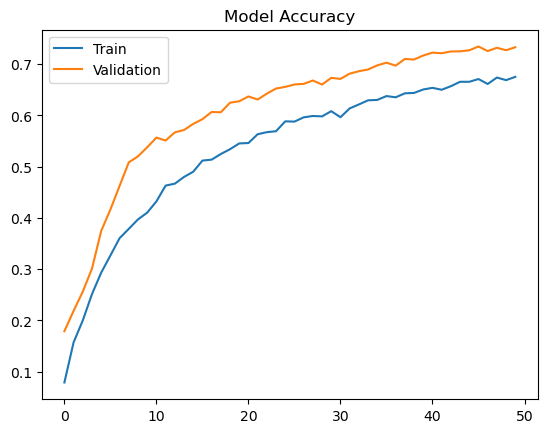

In [29]:
# plotting the Training & testing Accuracy 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='Train') 
plt.plot(history.history['val_accuracy'],label='Test')
plt.title("Model Accuracy")
plt.legend(["Train","Validation"],loc="upper left")
plt.show()

In [30]:
# Compare the performance of the model 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def Model_performance(model,x_test,y_test):
    y_pred=model.predict(x_test)
    y_pred_classes=np.argmax(y_pred,axis=1)
    y_actual=np.argmax(y_test,axis=1)
    Accuracy=accuracy_score(y_pred_classes,y_actual)
    Precision = precision_score(y_actual, y_pred_classes, average='macro')
    Recall = recall_score(y_actual, y_pred_classes, average='macro')
    F1 = f1_score(y_actual, y_pred_classes, average='macro')
    
    return Accuracy, Precision, Recall, F1
Performance=Model_performance(model,x_test,y_test)
print(f'Model_Performance--> Accuracy={Performance[0]}, Precision={Performance[1]}, Recall={Performance[2]}, F1={Performance[3]}')

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model_Performance--> Accuracy=0.7331101439571477, Precision=0.7453117607698163, Recall=0.7313441783750528, F1=0.7317500303640304


# Hyperparameter Tuning

In [31]:
# Install Keras tuner
! pip install keras-tuner

In [49]:
# Define the Model with Hyperparameters
from keras_tuner.tuners import RandomSearch
def build_model(hp):
    model=Sequential()
    model.add(Dense(
        units=hp.Int('units_1',min_value=32,max_value=512,step=32),activation="relu",input_dim=x_train.shape[1]
    ))
    model.add(Dense(
        units=hp.Int("units_2",min_value=32,max_value=512,step=32),activation="relu"
        
    ))
    model.add(Dense(26, activation='sigmoid')
    )
    
    model.compile(
        optimizer=hp.Choice("optimizer",values=["adam","rmsprop"]),
        loss='categorical_crossentropy',
        metrics=["accuracy"]
    
    )
    
    return model




In [51]:
# Perform the random search
tuner=RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5, # Number of models to try
    executions_per_trial=3,  # Number of times to train each model


)

Reloading Tuner from .\untitled_project\tuner0.json


In [52]:
# Perform the hyperparameter search 
tuner.search(x_train,y_train,epochs=50,validation_split=0.2)

Trial 5 Complete [00h 01m 35s]
val_accuracy: 0.867469867070516

Best val_accuracy So Far: 0.867469867070516
Total elapsed time: 00h 07m 19s


In [72]:
# Retrive the best model 
best_model=tuner.get_best_models(num_models=1)[0]
print("Best model:-",best_model)
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f' Loss : {loss}')
print(f' Accuracy : {accuracy}')

C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\shiva\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best model:- <Sequential name=sequential, built=True>
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8662 - loss: 0.4401
 Loss : 0.4438243806362152
 Accuracy : 0.8710411787033081


Epoch 1/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9070 - loss: 0.2836 - val_accuracy: 0.8771 - val_loss: 0.4269
Epoch 2/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9191 - loss: 0.2731 - val_accuracy: 0.8749 - val_loss: 0.4308
Epoch 3/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9274 - loss: 0.2493 - val_accuracy: 0.8749 - val_loss: 0.4268
Epoch 4/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9300 - loss: 0.2365 - val_accuracy: 0.8733 - val_loss: 0.4266
Epoch 5/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9285 - loss: 0.2393 - val_accuracy: 0.8711 - val_loss: 0.4311
Epoch 6/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9324 - loss: 0.2243 - val_accuracy: 0.8684 - val_loss: 0.4327
Epoch 7/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9297 - loss: 0.2234 - val_accuracy: 0.8784 - val_loss: 0.4126
Epoch 8/50
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9461 - loss: 0.1927 - val_accuracy:

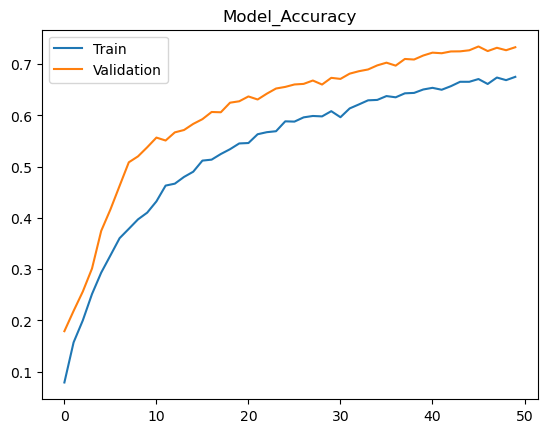

In [73]:
# plot training & testing validation accuracy values 
history_1=best_model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Validation")
plt.title("Model_Accuracy")
plt.legend(["Train","Validation"],loc="upper left")